<h5>Herd Behavior Index.

HBI is a quantitative metric to measure the extent at which individual asset returns deviate 
from their respective market average; when an asset moves closely in line with the market's returns, 
it is said to behave "in herd," indicating a strong correlation with market movements. 
Significant deviations from this behavior implies that the stock is moving against the "herd", 
which could be due to unique factors specific to the asset or new market dynamics.

In [3]:
#-- Modules & Packages

import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt

import python_ta as ta

from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

In [14]:
#-- Input Assets and Market index of choice according to yahooFinance naming system.
#-- For crypto we must compare with the only benchmark index BTC-USD price
asset = ['APE-USD']
market = ['BTC-USD']


In [15]:
#-- Collecting 3 years 
start_date = date.today() + relativedelta(months = - 36)
end_date = date.today()

#-- 1h ohlcv data collection
df_asset = yf.download(asset, start_date, end_date, interval = '1D')
df_index = yf.download(market, start_date, end_date, interval = '1D')

#-- Daily returns 
asset_ret = df_asset['Close'].pct_change().dropna()
index_ret = df_index['Close'].pct_change().dropna()

#-- Rolling window
window_sz =  30

#-- Rolling Herding Behavior Index
rolling_HBI = (np.abs(asset_ret - index_ret).rolling(window_sz).mean() / 
               np.abs(asset_ret).rolling(window_sz).mean())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


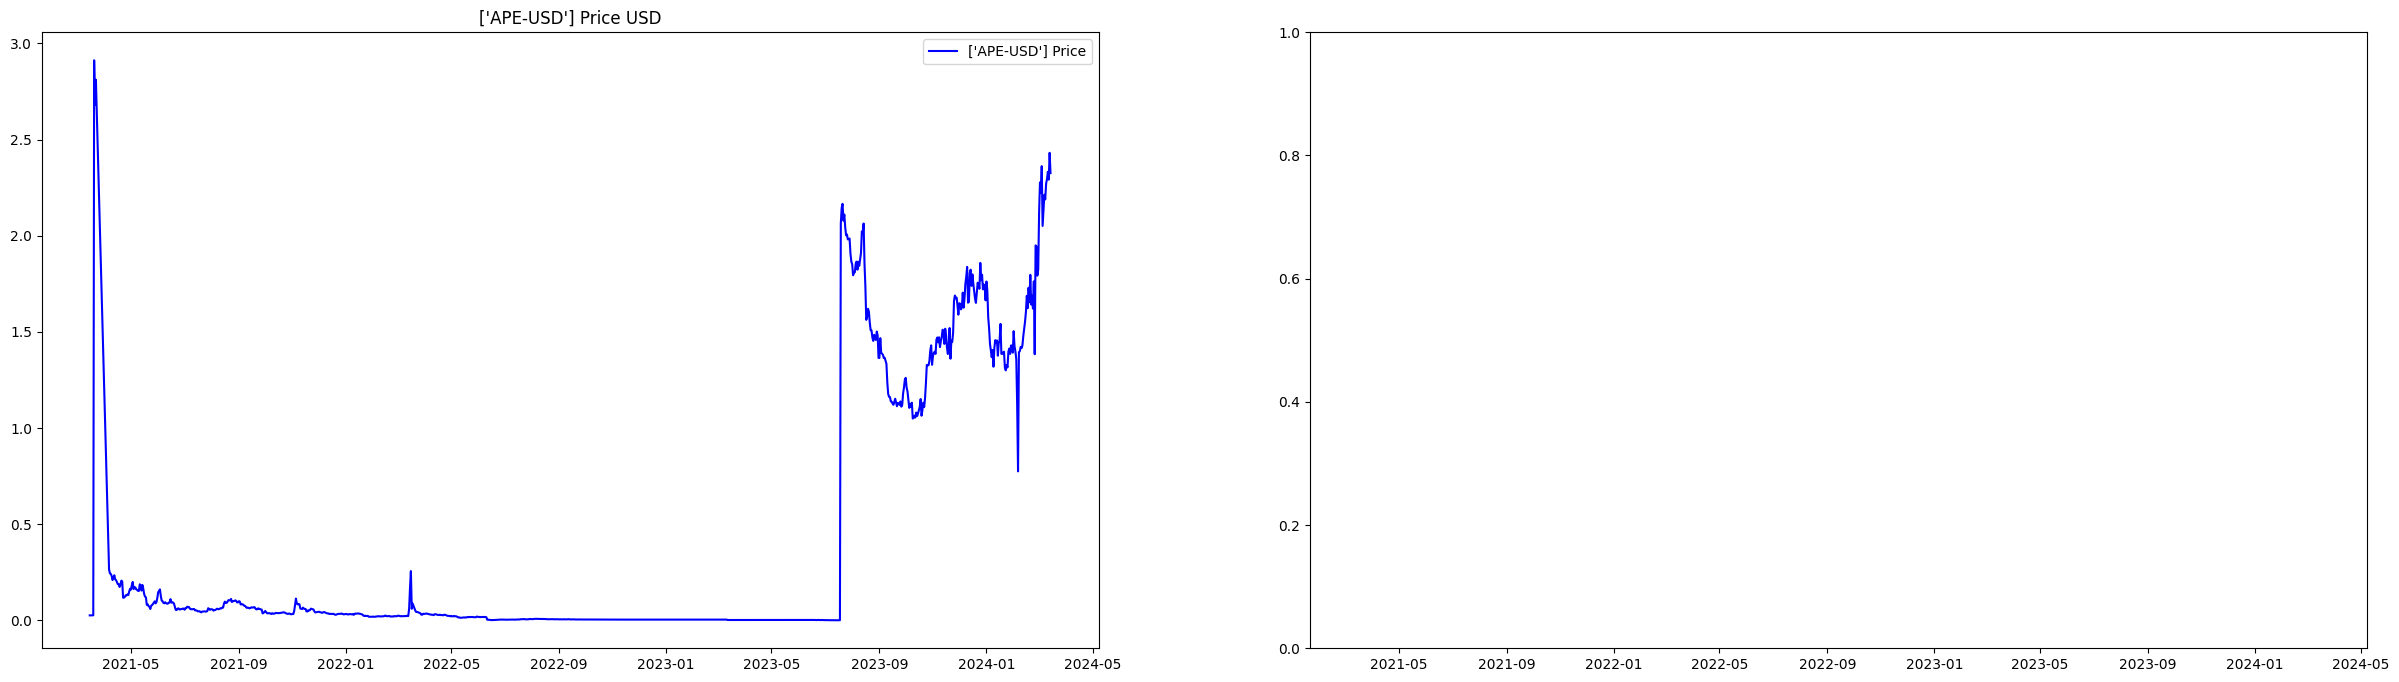

In [17]:
#-- Plotting 

fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(30,8), sharex= True)


#-- Plot of selected asset
ax1.plot(df_asset['Close'], label = f'{asset} Price', color = 'blue')
ax1.set_title(f'{asset} Price USD')
ax1.legend()

#-- Plot of index, benchmark
ax2.plot(df_asset['Close'], label = f'{asset} Price', color = 'blue')
ax2.set_title(f'{asset} Price USD')
ax2.legend()